<a href="https://colab.research.google.com/github/lou-i0/genai_practice/blob/main/CTGAN_struct_synth_data_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_

In [2]:
!pip install table_evaluator

In [4]:
#get sample library from pandas

import pandas as pd
test = pd.read_csv("/content/sample_data/california_housing_train.csv")
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
# import and fit the Conidiional Generative Adversial Network (CTGAN) model against the data brught in

from ctgan import CTGAN

ctgan = CTGAN(verbose = True)
ctgan.fit(test, epochs = 200)

Gen. (-0.85) | Discrim. (-0.06): 100%|██████████| 200/200 [08:46<00:00,  2.63s/it]


In [7]:
# create sample data from the fit
samples = ctgan.sample(200)

In [8]:
samples


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.411596,38.269783,46.659060,2623.233953,539.982557,963.612053,328.338911,5.654829,444736.873791
1,-117.918912,34.358171,36.708084,2801.728726,450.218463,938.704816,751.130962,3.726769,285153.112145
2,-121.876270,38.984707,35.258391,1210.197071,290.546488,393.268787,224.559259,1.813054,66984.262927
3,-116.329726,32.739263,20.565950,1162.933234,151.011139,271.341948,117.952431,2.037827,183130.854179
4,-121.860419,37.529695,45.326151,1356.598369,299.824847,872.339425,246.562743,3.733159,272446.899742
...,...,...,...,...,...,...,...,...,...
195,-123.675531,33.477336,32.766349,885.232584,388.198687,469.581467,221.077546,2.968514,99263.376638
196,-117.765244,33.971184,22.527143,929.369070,41.266086,1159.629161,97.557114,2.367225,113151.109179
197,-121.170599,38.567642,12.520599,4824.454738,1574.123369,3680.792527,2502.244076,5.516367,280901.946944
198,-122.000319,36.888827,15.075718,2811.118585,549.685102,1123.024473,433.815184,2.071084,64669.479897


In [9]:
from table_evaluator import TableEvaluator as te

In [10]:
print(test.shape, samples.shape)

(17000, 9) (200, 9)


In [14]:
# comparison of fake against original data
teval = te(real =test, fake = samples)

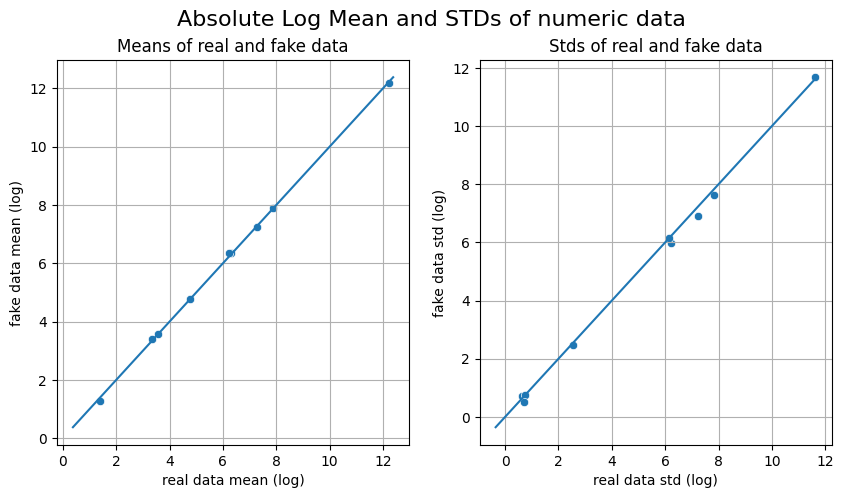

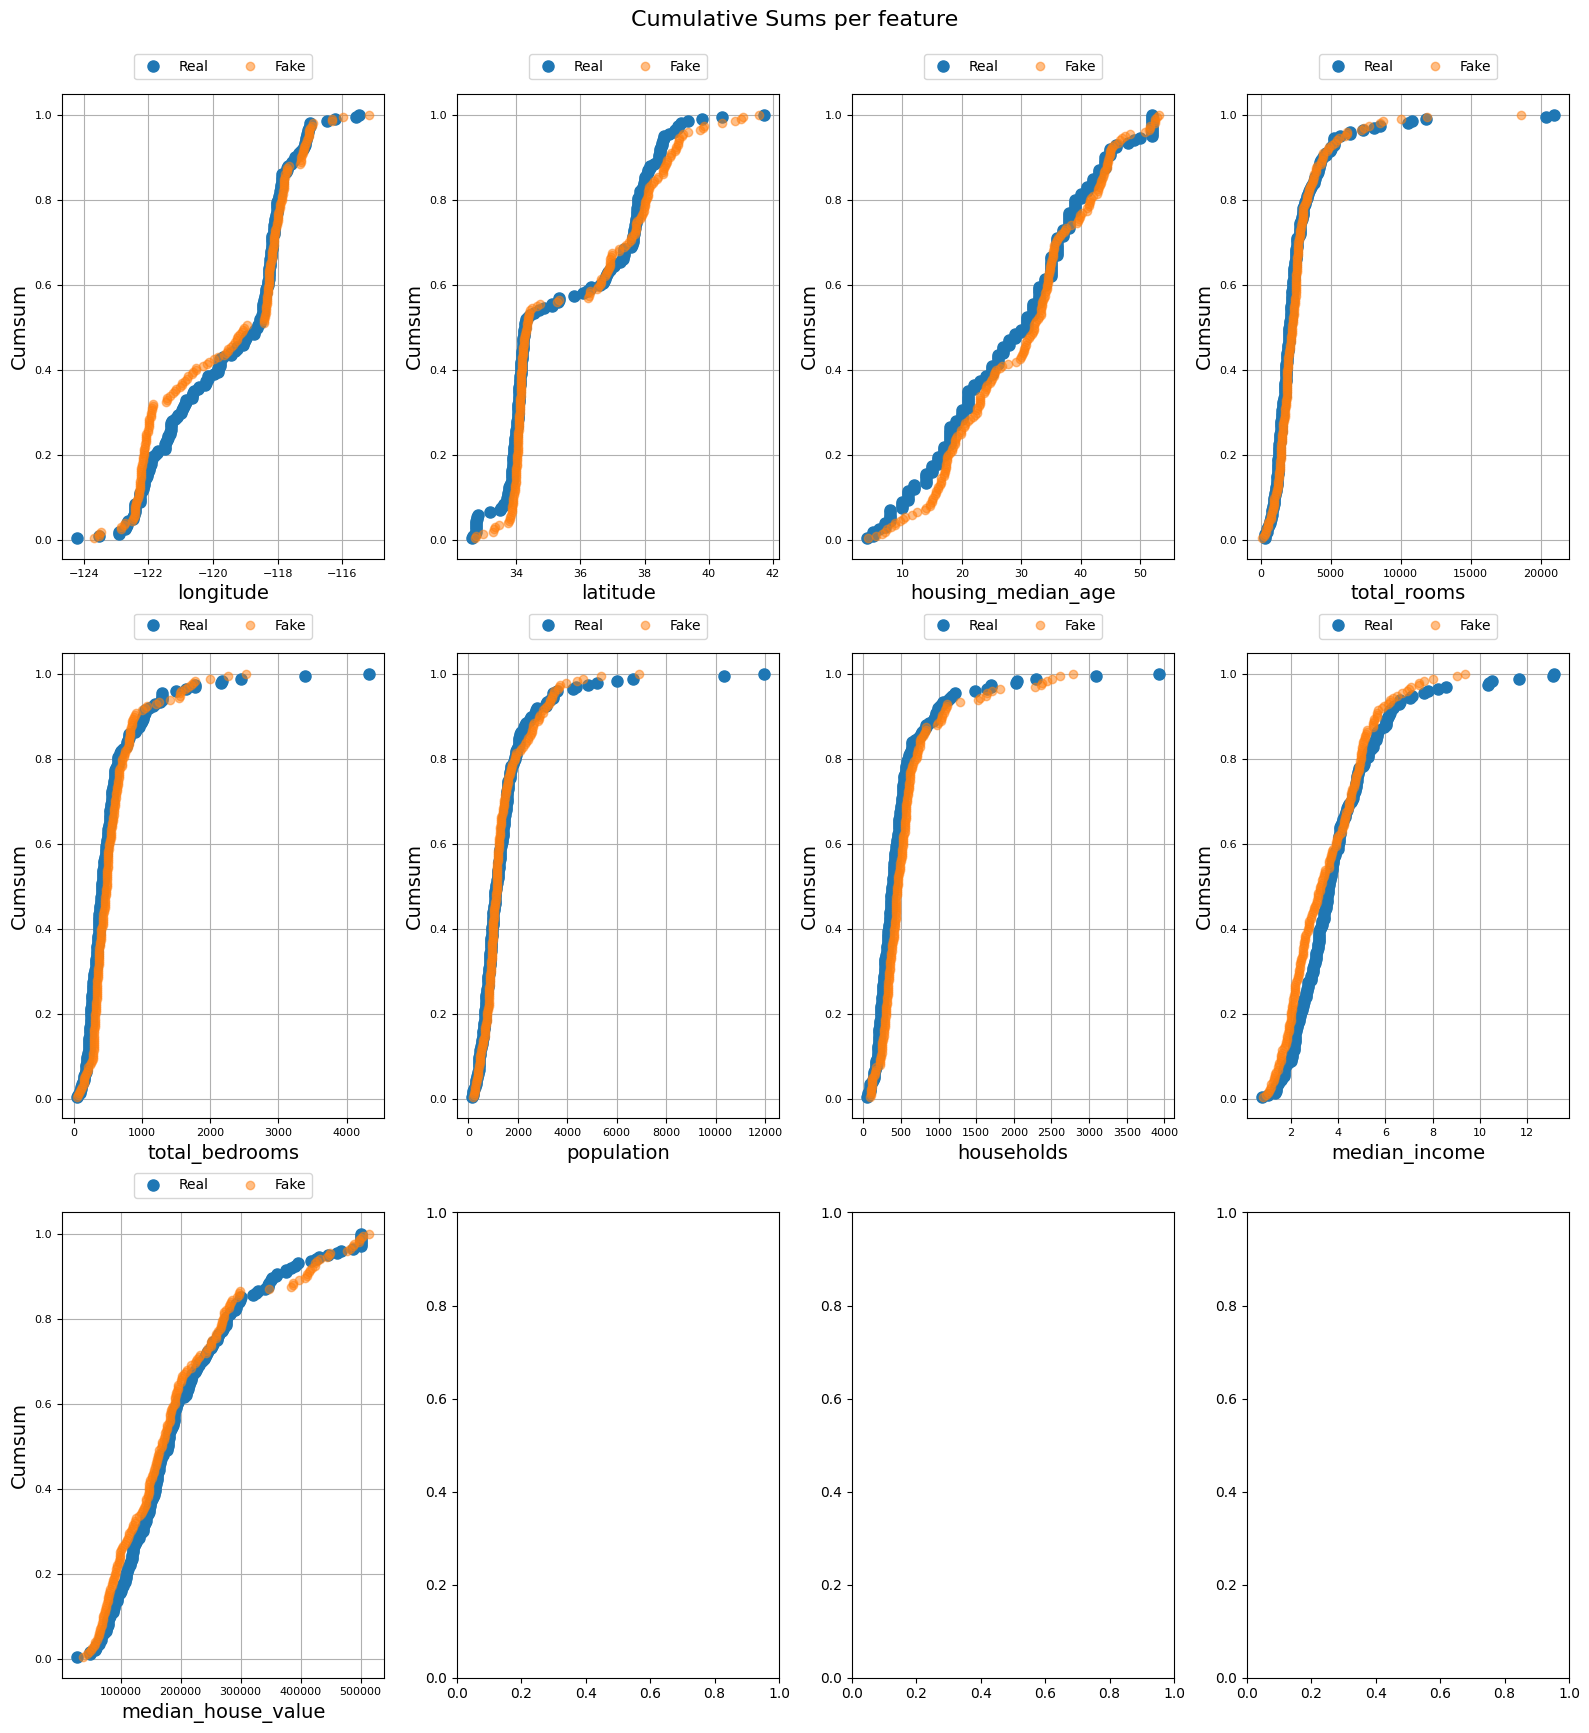

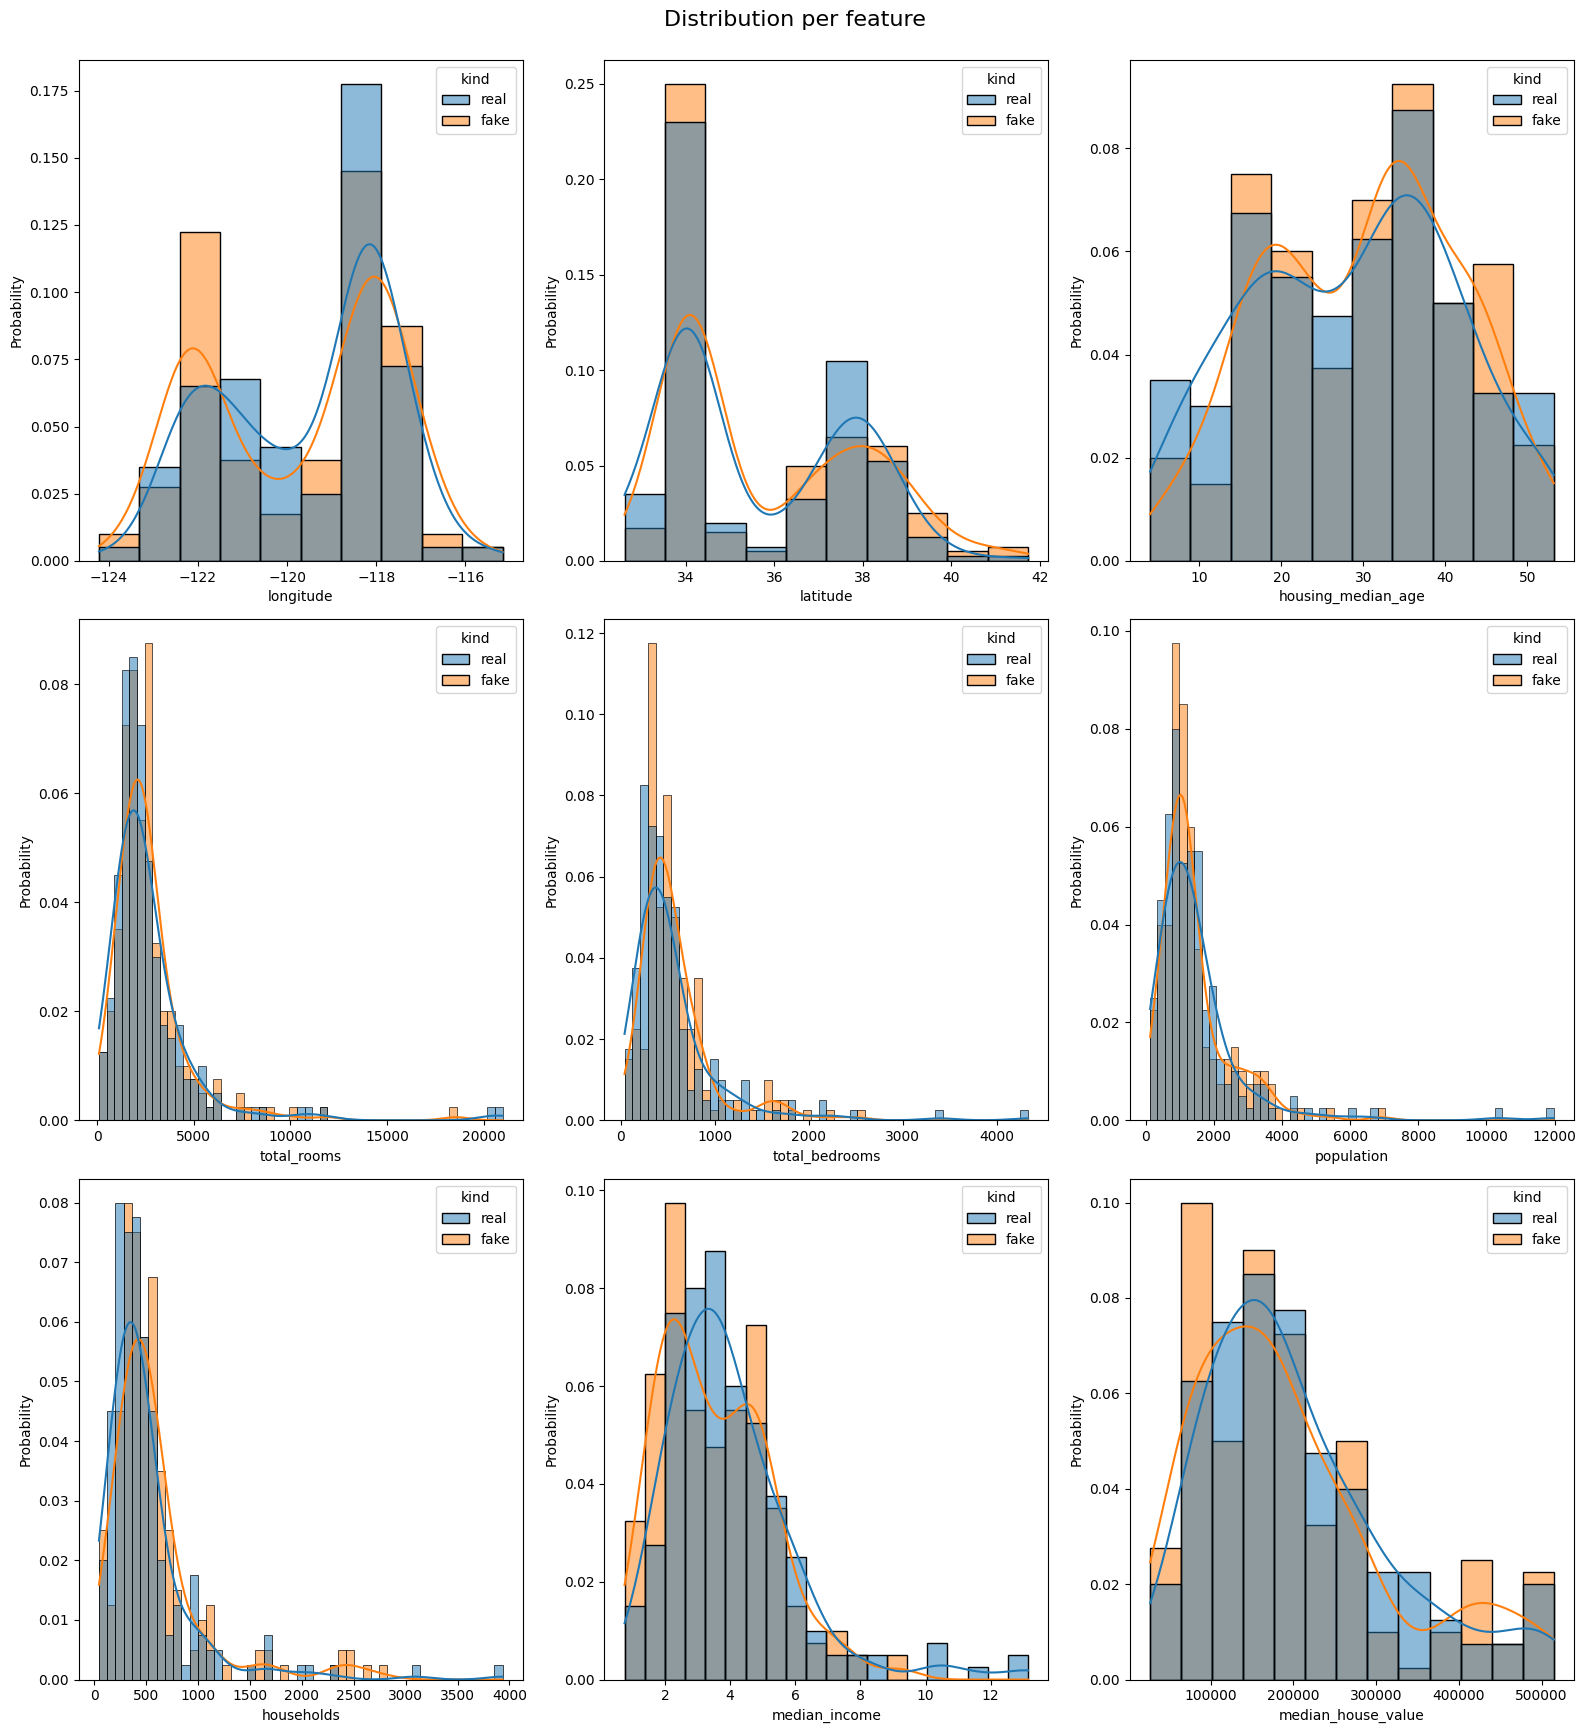

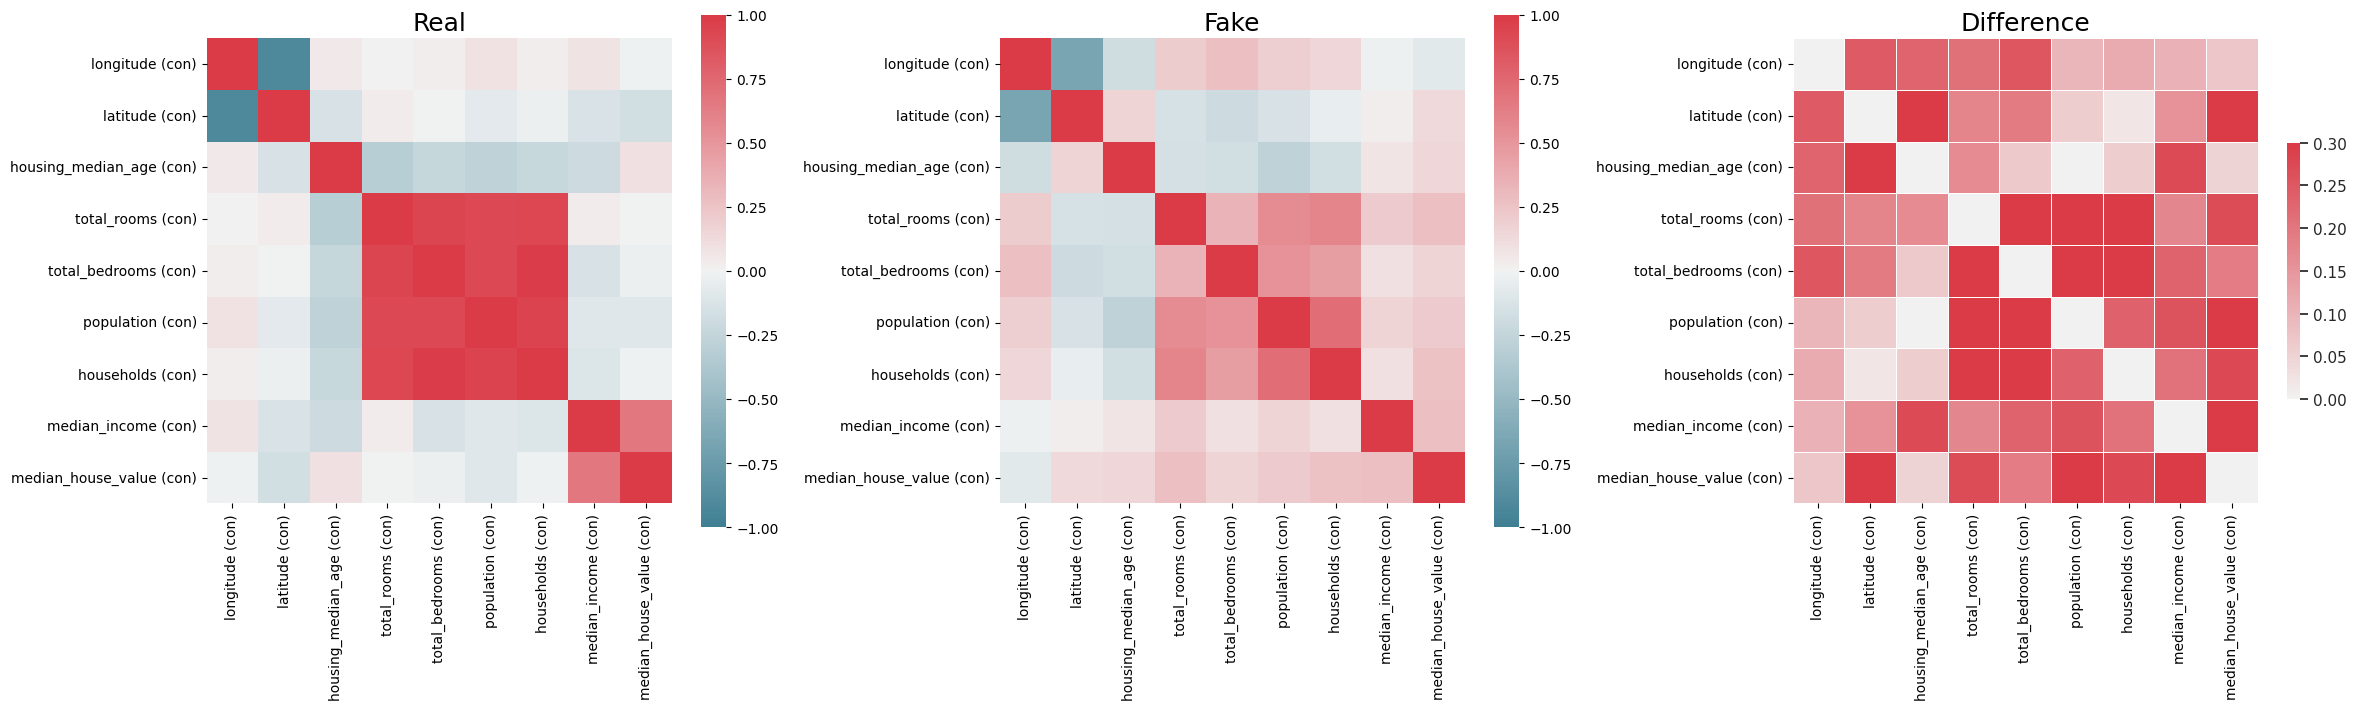

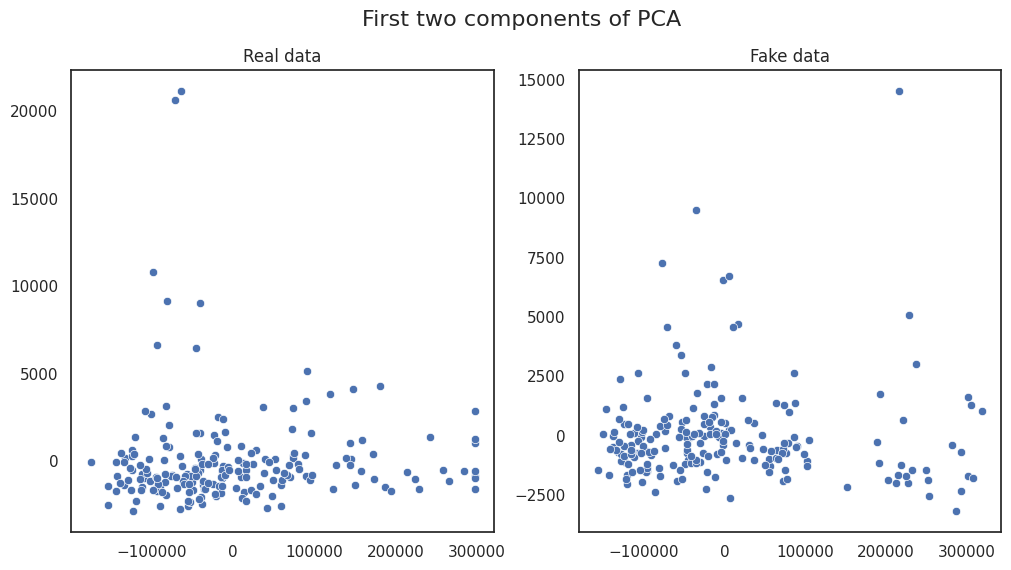

In [15]:
#eval in vis
teval.visual_evaluation()